Para as aplicações será usada a linguagem python e a biblioteca Biopython, portanto o primeiro passo é a instalação da biblioteca.

In [2]:
# instalando pacotes adicionais
!pip install biopython --upgrade

     |████████████████████████████████| 2.2MB 5.1MB/s 


Neste exemplo serão usadas sequencias do DNA humano e de uma bacteria, a seguir é feita a importação desses aqrquivos no formato FASTA. 

In [3]:
import os
import tarfile
from six.moves import urllib

FILE_BACTERIA =  "bacteria.fasta"
FILE_HUMANO =  "humano.fasta"
DOWNLOAD_ROOT = "https://github.com/JohnVictor2017/bioinformatica/raw/master/"
DATA_PATH = "dados/"

def fetch_data(data_url, data_path, file_to_download):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
# baixando o arquivo bacteria.fasta
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_BACTERIA
fetch_data(DATA_URL, DATA_PATH, FILE_BACTERIA)

# baixando o arquivo humano.fasta
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_HUMANO
fetch_data(DATA_URL, DATA_PATH, FILE_HUMANO)


# observando se o diretório "dados" foi criado com sucesso 
!ls dados

bacteria.fasta	humano.fasta


Lendo os arquivos das sequências.

In [4]:
bacteria = open(DATA_PATH+FILE_BACTERIA).read()
humano = open(DATA_PATH+FILE_HUMANO).read()

# removendo as quebras de linha
bacteria = bacteria.replace("\n","")
humano = humano.replace("\n","")

print('DNA_bacteria: ' + bacteria)
print('DNA_humano: ' + humano)

DNA_bacteria: AGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGCAGCTTGCTGCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGCACAAAGAGGGGGACCTTAGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCAACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGATAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGTCTTGACATCC

Importando a função Seq do Biopython para ler as sequências e fazer algumas operações.

In [5]:
# tutorial https://biopython.org/wiki/Seq
# importando a biblioteca para ser utilizada
from Bio.Seq import Seq

#armazenando as sequencias
bacteria = Seq(bacteria)
humano = Seq(humano)

# Agora temos nossa sequência de uma bacteria
print("DNA: " + bacteria)

#gerando sequencia complementar
bacteria_complemento = bacteria.complement()
print("Complementar: " + bacteria_complemento)

# Gerando o RNA mensageiro
bacteria_RNA = bacteria.transcribe()
print("RNA: " + bacteria_RNA)



DNA: AGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGCAGCTTGCTGCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGCACAAAGAGGGGGACCTTAGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCAACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGATAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGTCTTGACATCCACGGAAGTT

Como exemplo será feita um comparação visual da quantidade de pares de nucleotidios no DNA humano e na bacteria.

In [6]:
# Contando pares da bacteria 
# Sabemos que cada um da sequencia ira se juntar a seu correspondente complementar
AT_B = bacteria.count("A");
TA_B = bacteria.count("T");
GC_B = bacteria.count("G");
CG_B = bacteria.count("C");

#contando os pares do humano
AT_H = humano.count("A");
TA_H = humano.count("T");
GC_H = humano.count("G");
CG_H = humano.count("C");

cont_B = {'AT': AT_B, 'TA': TA_B, 'GC': GC_B, 'CG':CG_B}
cont_H = {'AT': AT_H, 'TA': TA_H, 'GC': GC_H, 'CG':CG_H}
 
print('Bacteria:')
print(cont_B)
print('Humano:')
print(cont_H)


Bacteria:
{'AT': 366, 'TA': 289, 'GC': 463, 'CG': 329}
Humano:
{'AT': 422, 'TA': 418, 'GC': 578, 'CG': 546}


Plotando os Gráficos de cada par de nucletidio.

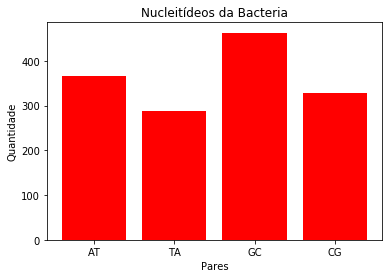

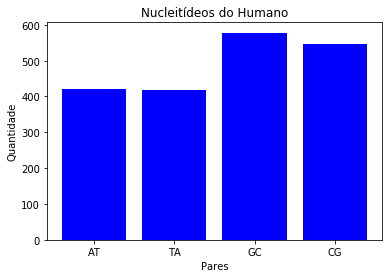

In [9]:
import matplotlib.pyplot as plt
import numpy as np

pares=["AT", "TA", "GC", "CG"]
bacteria= [AT_B, TA_B, GC_B, CG_B]
humano= [AT_H, TA_H, GC_H, CG_H]

plt.bar(pares, bacteria, color="red")

plt.xticks(pares)
plt.xlabel("Pares")
plt.ylabel("Quantidade")
plt.title("Nucleitídeos da Bacteria")
plt.show()


plt.bar(pares, humano, color="blue")

plt.xticks(pares)
plt.xlabel("Pares")
plt.ylabel("Quantidade")
plt.title("Nucleitídeos do Humano")
plt.show()
